In [1]:
import numpy as np
import nltk
import pandas as pd
import re
import string

In [2]:
df = pd.read_csv("inflasi_training.csv",encoding="ISO-8859-1",on_bad_lines='skip')
df.head()

,teks,label
0,ajar kuliah anut faham makro ekonomii merkanti...,netral
1,alhamdulillah puji syukur inflasi jaga tingkat...,positif
2,anggota koramil ngrampal giat patroli monitori...,positif
3,ayam mahal telur barang harga inflasi gila seb...,negatif
4,badan pusat statistik bps catat tingkat inflas...,negatif


In [3]:
df['label'].value_counts()

negatif    228
positif    194
netral     159
Name: label, dtype: int64

In [4]:
s_positif = df[df['label'] == 'positif'].sample(247,replace=True)
s_netral = df[df['label'] == 'netral'].sample(400,replace=True)
s_negatif = df[df['label'] == 'negatif'].sample(245,replace=True)
df = pd.concat([s_positif,s_negatif,s_netral])

print(df.shape)
print(df['label'].value_counts(normalize=True))

(892, 2)
netral     0.448430
positif    0.276906
negatif    0.274664
Name: label, dtype: float64


In [5]:
def remove_pattern(tweet, pattern):
    r = re.findall(pattern, tweet)
    for i in r:
        tweet = re.sub(i,'', tweet)
    return tweet    
df['remove_user'] = np.vectorize(remove_pattern)(df['teks'], "@[\w]*")
df

,teks,label,remove_user
482,kebijakan jokowi fokuskan jaga inflasi dan pul...,positif,kebijakan jokowi fokuskan jaga inflasi dan pul...
82,persen kuartal ii ekonomii indonesia tumbuh ni...,positif,persen kuartal ii ekonomii indonesia tumbuh ni...
382,new post sekda makassar menangani inflasi mela...,positif,new post sekda makassar menangani inflasi mela...
69,perintah indonesia kendali inflasi perintah op...,positif,perintah indonesia kendali inflasi perintah op...
472,airlangga juga menjelaskan bahwa inflasi diper...,positif,airlangga juga menjelaskan bahwa inflasi diper...
...,...,...,...
431,kita dah nampak kesan yang lepas bila ramai ad...,netral,kita dah nampak kesan yang lepas bila ramai ad...
569,kapan nih kalian ikut reksadana mandiri livin ...,netral,kapan nih kalian ikut reksadana mandiri livin ...
207,hyper inflasi hyper inflasi hujung pimpin karn...,netral,hyper inflasi hyper inflasi hujung pimpin karn...
394,iyahhh dari sebelum nikah sdh ada pembahasan k...,netral,iyahhh dari sebelum nikah sdh ada pembahasan k...


### **CASE FOLDING & Cleaning Teks**

In [6]:
def remove(teks):
  # Casefolding - mengubah ke case yang sama semua (misal huruf kecil semua)
    teks = teks.lower()
  #Cleaning
    teks = re.sub('[0-9]+', '', teks)#menghilangkan Angka
    teks = re.sub(r'\$\w*', '', teks)
    teks = re.sub(r'rt :[\s]+', '', teks)
    teks = re.sub("b'|b\"",'',teks)
    teks = re.sub(r"(?:\@|http?\://|https?\://|www)\S+","", teks)
    teks = teks.translate(str.maketrans('','',string.punctuation))#Menghapus karakter tanda baca.
    teks = re.sub('<.*?>','',teks)
    teks = re.sub("\n"," ",teks)
    teks = re.sub(r"\b[a-zA-Z]\b","",teks)
    teks = re.sub(r',','',teks)
    teks = re.sub(r'#', '', teks)#menghilangkan Hastag
    teks = ' '.join(teks.split())
    teks = teks.encode('ascii', 'replace').decode('ascii')
    return teks


df['clean_tweet'] = df['remove_user'].apply(lambda x: remove(x))
df.drop_duplicates(subset ="clean_tweet", keep = 'first', inplace = True)
#df.drop_duplicates(subset ="teks", keep = 'first', inplace = True)
df['clean_tweet'].to_csv('data_bersih_111.csv',encoding='utf8', index=False)
df

,teks,label,remove_user,clean_tweet
482,kebijakan jokowi fokuskan jaga inflasi dan pul...,positif,kebijakan jokowi fokuskan jaga inflasi dan pul...,kebijakan jokowi fokuskan jaga inflasi dan pul...
82,persen kuartal ii ekonomii indonesia tumbuh ni...,positif,persen kuartal ii ekonomii indonesia tumbuh ni...,persen kuartal ii ekonomii indonesia tumbuh ni...
382,new post sekda makassar menangani inflasi mela...,positif,new post sekda makassar menangani inflasi mela...,new post sekda makassar menangani inflasi mela...
69,perintah indonesia kendali inflasi perintah op...,positif,perintah indonesia kendali inflasi perintah op...,perintah indonesia kendali inflasi perintah op...
472,airlangga juga menjelaskan bahwa inflasi diper...,positif,airlangga juga menjelaskan bahwa inflasi diper...,airlangga juga menjelaskan bahwa inflasi diper...
...,...,...,...,...
552,dirjen bri mengatan ukm memiliki multiplier ef...,netral,dirjen bri mengatan ukm memiliki multiplier ef...,dirjen bri mengatan ukm memiliki multiplier ef...
197,bank indonesia proyeksi inflasi oktober capai ...,netral,bank indonesia proyeksi inflasi oktober capai ...,bank indonesia proyeksi inflasi oktober capai ...
133,gejolak ekonomii sektor umkm indonesia tumbuh ...,netral,gejolak ekonomii sektor umkm indonesia tumbuh ...,gejolak ekonomii sektor umkm indonesia tumbuh ...
287,ibarat senjata bi menembakkan amunisi untuk me...,netral,ibarat senjata bi menembakkan amunisi untuk me...,ibarat senjata bi menembakkan amunisi untuk me...


In [7]:
#df.drop_duplicates(subset ="clean_tweet", keep = 'first', inplace = True)
#df.to_csv('inflasi_3.csv',encoding='utf8', index=False)
#df

### **TOKENIZING**

In [8]:
def tokenizing(teks):
    nstr = teks.split(' ')
    dat = []
    a = -1
    for hu in nstr:
        a = a+1
    if hu == '':
        dat.append(a)
    p = 0
    b = 0
    for q in dat:
        b = q - p
        del nstr[b]
        p = p + 1
    return nstr
df['Tokenizing'] = df['clean_tweet'].apply(lambda x: tokenizing(x.lower()))
df.head(10)

,teks,label,remove_user,clean_tweet,Tokenizing
482,kebijakan jokowi fokuskan jaga inflasi dan pul...,positif,kebijakan jokowi fokuskan jaga inflasi dan pul...,kebijakan jokowi fokuskan jaga inflasi dan pul...,"[kebijakan, jokowi, fokuskan, jaga, inflasi, d..."
82,persen kuartal ii ekonomii indonesia tumbuh ni...,positif,persen kuartal ii ekonomii indonesia tumbuh ni...,persen kuartal ii ekonomii indonesia tumbuh ni...,"[persen, kuartal, ii, ekonomii, indonesia, tum..."
382,new post sekda makassar menangani inflasi mela...,positif,new post sekda makassar menangani inflasi mela...,new post sekda makassar menangani inflasi mela...,"[new, post, sekda, makassar, menangani, inflas..."
69,perintah indonesia kendali inflasi perintah op...,positif,perintah indonesia kendali inflasi perintah op...,perintah indonesia kendali inflasi perintah op...,"[perintah, indonesia, kendali, inflasi, perint..."
472,airlangga juga menjelaskan bahwa inflasi diper...,positif,airlangga juga menjelaskan bahwa inflasi diper...,airlangga juga menjelaskan bahwa inflasi diper...,"[airlangga, juga, menjelaskan, bahwa, inflasi,..."
502,sebagai summary recession dijngka lebih mild n...,positif,sebagai summary recession dijngka lebih mild n...,sebagai summary recession dijngka lebih mild n...,"[sebagai, summary, recession, dijngka, lebih, ..."
252,negara jitu perintah tekan tingkat inflasi ind...,positif,negara jitu perintah tekan tingkat inflasi ind...,negara jitu perintah tekan tingkat inflasi ind...,"[negara, jitu, perintah, tekan, tingkat, infla..."
13,emas alternatif tabung investasi jangka emas g...,positif,emas alternatif tabung investasi jangka emas g...,emas alternatif tabung investasi jangka emas g...,"[emas, alternatif, tabung, investasi, jangka, ..."
11,efektif tekan inflasi di makassar,positif,efektif tekan inflasi di makassar,efektif tekan inflasi di makassar,"[efektif, tekan, inflasi, di, makassar]"
480,blt bbm berperan penting mencegah inflasi dan ...,positif,blt bbm berperan penting mencegah inflasi dan ...,blt bbm berperan penting mencegah inflasi dan ...,"[blt, bbm, berperan, penting, mencegah, inflas..."


### **FREKUENSI TOKENS**

In [9]:
from nltk.probability import FreqDist
def freqDist_wrapper(text):
    return FreqDist(text)

df['tweet_tokens_fdist'] = df['Tokenizing'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))


Frequency Tokens : 

482    [(kebijakan, 1), (jokowi, 1), (fokuskan, 1), (...
82     [(persen, 1), (kuartal, 1), (ii, 1), (ekonomii...
382    [(new, 1), (post, 1), (sekda, 1), (makassar, 1...
69     [(perintah, 2), (inflasi, 2), (indonesia, 1), ...
472    [(airlangga, 2), (inflasi, 2), (hir, 2), (tahu...
Name: tweet_tokens_fdist, dtype: object


### **STOPWORDS**

In [10]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo','ko','gi','tu','ni','pt','yu','yas', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang','ie','to','im','ii','da','pj', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',"loh","xfxfxx",'iv',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya','lh',"nah","xfxfxcxbf", 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',"amp","hmm",'dah','sok','sbb','ayo',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','hehehe',
                       '&amp', 'yah','guys','hai','iii','yuk','kan','cuss','gengss','ges','wk'])
len(list_stopwords)
# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopword.txt", names= ["stopword"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopword"][0].split(' '))
len(list_stopwords)
# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['tweet_tokens_WSW'] = df['Tokenizing'].apply(stopwords_removal) 


print(df['tweet_tokens_WSW'].head())

758
482    [kebijakan, jokowi, fokuskan, jaga, inflasi, p...
82     [persen, kuartal, ekonomii, indonesia, tumbuh,...
382    [new, post, sekda, makassar, menangani, inflas...
69     [perintah, indonesia, kendali, inflasi, perint...
472    [airlangga, inflasi, diperkiran, terkendali, h...
Name: tweet_tokens_WSW, dtype: object


### **NORMALISASI**

In [11]:
from pandas.core.computation.pytables import Term
normalisasi = pd.read_csv("Normalisasi.csv",encoding="latin1")
normalisasi_dict = {}
for index, row in normalisasi.iterrows():
    if row[0] not in normalisasi_dict:
        normalisasi_dict[row[0]]=row[1]

def normalisasi_term(document):
    return[normalisasi_dict[term] if term in normalisasi_dict else term for term in document]

df['Normalisasi'] = df['tweet_tokens_WSW'].apply(normalisasi_term)
df


,teks,label,remove_user,clean_tweet,Tokenizing,tweet_tokens_fdist,tweet_tokens_WSW,Normalisasi
482,kebijakan jokowi fokuskan jaga inflasi dan pul...,positif,kebijakan jokowi fokuskan jaga inflasi dan pul...,kebijakan jokowi fokuskan jaga inflasi dan pul...,"[kebijakan, jokowi, fokuskan, jaga, inflasi, d...","{'kebijakan': 1, 'jokowi': 1, 'fokuskan': 1, '...","[kebijakan, jokowi, fokuskan, jaga, inflasi, p...","[kebijakan, jokowi, fokuskan, jaga, inflasi, p..."
82,persen kuartal ii ekonomii indonesia tumbuh ni...,positif,persen kuartal ii ekonomii indonesia tumbuh ni...,persen kuartal ii ekonomii indonesia tumbuh ni...,"[persen, kuartal, ii, ekonomii, indonesia, tum...","{'persen': 1, 'kuartal': 1, 'ii': 1, 'ekonomii...","[persen, kuartal, ekonomii, indonesia, tumbuh,...","[persen, kuartal, ekonomii, indonesia, tumbuh,..."
382,new post sekda makassar menangani inflasi mela...,positif,new post sekda makassar menangani inflasi mela...,new post sekda makassar menangani inflasi mela...,"[new, post, sekda, makassar, menangani, inflas...","{'new': 1, 'post': 1, 'sekda': 1, 'makassar': ...","[new, post, sekda, makassar, menangani, inflas...","[new, post, sekda, makassar, menangani, inflas..."
69,perintah indonesia kendali inflasi perintah op...,positif,perintah indonesia kendali inflasi perintah op...,perintah indonesia kendali inflasi perintah op...,"[perintah, indonesia, kendali, inflasi, perint...","{'perintah': 2, 'indonesia': 1, 'kendali': 1, ...","[perintah, indonesia, kendali, inflasi, perint...","[perintah, indonesia, kendali, inflasi, perint..."
472,airlangga juga menjelaskan bahwa inflasi diper...,positif,airlangga juga menjelaskan bahwa inflasi diper...,airlangga juga menjelaskan bahwa inflasi diper...,"[airlangga, juga, menjelaskan, bahwa, inflasi,...","{'airlangga': 2, 'juga': 1, 'menjelaskan': 1, ...","[airlangga, inflasi, diperkiran, terkendali, h...","[airlangga, inflasi, diperkiran, terkendali, h..."
...,...,...,...,...,...,...,...,...
552,dirjen bri mengatan ukm memiliki multiplier ef...,netral,dirjen bri mengatan ukm memiliki multiplier ef...,dirjen bri mengatan ukm memiliki multiplier ef...,"[dirjen, bri, mengatan, ukm, memiliki, multipl...","{'dirjen': 1, 'bri': 1, 'mengatan': 1, 'ukm': ...","[dirjen, bri, mengatan, ukm, memiliki, multipl...","[dirjen, bri, mengatan, ukm, memiliki, multipl..."
197,bank indonesia proyeksi inflasi oktober capai ...,netral,bank indonesia proyeksi inflasi oktober capai ...,bank indonesia proyeksi inflasi oktober capai ...,"[bank, indonesia, proyeksi, inflasi, oktober, ...","{'bank': 1, 'indonesia': 1, 'proyeksi': 1, 'in...","[bank, indonesia, proyeksi, inflasi, oktober, ...","[bank, indonesia, proyeksi, inflasi, oktober, ..."
133,gejolak ekonomii sektor umkm indonesia tumbuh ...,netral,gejolak ekonomii sektor umkm indonesia tumbuh ...,gejolak ekonomii sektor umkm indonesia tumbuh ...,"[gejolak, ekonomii, sektor, umkm, indonesia, t...","{'gejolak': 1, 'ekonomii': 1, 'sektor': 1, 'um...","[gejolak, ekonomii, sektor, umkm, indonesia, t...","[gejolak, ekonomii, sektor, umkm, indonesia, t..."
287,ibarat senjata bi menembakkan amunisi untuk me...,netral,ibarat senjata bi menembakkan amunisi untuk me...,ibarat senjata bi menembakkan amunisi untuk me...,"[ibarat, senjata, bi, menembakkan, amunisi, un...","{'ibarat': 1, 'senjata': 1, 'bi': 2, 'menembak...","[senjata, bi, menembakkan, amunisi, target, rd...","[senjata, bi, menembakkan, amunisi, target, rd..."


In [12]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Normalisasi']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['tweet'] = df['Normalisasi'].swifter.apply(get_stemmed_term)
print(df['tweet'])

1570
------------------------
kebijakan : bijak
jokowi : jokowi
fokuskan : fokus
jaga : jaga
inflasi : inflasi
pulihkan : pulih
ekonomii : ekonomi
apbn : apbn
dinilai : nilai
persen : persen
kuartal : kuartal
indonesia : indonesia
tumbuh : tumbuh
nilai : nilai
angka : angka
bbmsubs : bbmsubs
new : new
post : post
sekda : sekda
makassar : makassar
menangani : tangan
lorong : lorong
wisata : wisata
has : has
been : been
published : published
on : on
perintah : perintah
kendali : kendali
optimis : optimis
jelang : jelang
airlangga : airlangga
diperkiran : kir
terkendali : kendali
hir : hir
memperkira : kira
sai : sai
kisaran : kisar
summary : summary
recession : recession
dijngka : dijngka
mild : mild
an : an
ganti : ganti
tema : tema
rate : rate
hike : hike
kos : kos
meminjam : pinjam
tggi : tggi
mengibatkan : mengibatkan
slowdown : slowdown
orang : orang
meminjamduit : meminjamduit
in : in
circulation : circulation
ma : ma
harga : harga
dijangka : jangka
terkawal : kawal
bukan : bukan
n

forex : forex
ambil : ambil
profit : profit
cma : cma
circle : circle
sambo : sambo
teddy : teddy
juchedeia : juchedeia
komunis : komunis
pki : pki
bnr : bnr
smua : smua
trading : trading
mafia : mafia
kripto : kripto
menaikkan : naik
um : um
lengkap : lengkap
cepat : cepat
beritanya : berita
keuangan : uang
iphone : iphone
alami : alami
koran : koran
jakarta : jakarta
tarif : tarif
listrik : listrik
permintaan : minta
angkutan : angkut
bal : bal
berkontribusi : kontribusi
jatuh : jatuh
jurang : jurang
ada : ada
nama : nama
na : na
ngantemi : ngantemi
perusahaan : usaha
prmen : prmen
mungkin : mungkin
cri : cri
msaslah : msaslah
psti : psti
vs : vs
narkoboy : narkoboy
tembus : tembus
bukittinggi : bukittinggi
sumatera : sumatera
barat : barat
isu : isu
fix : fix
world : world
cup : cup
risau : risau
next : next
year : year
ringgit : ringgit
junam : junam
tetiba : tetiba
puak : puak
habis : habis
melayu : melayu
kene : kene
tindas : tindas
yahudi : yahudi
masuk : masuk
lepas : lepas
saj

shingga : shingga
dperlukan : dperlukan
seribu : ribu
kilo : kilo
henggit : henggit
lambung : lambung
nyata : nyata
pengusaha : usaha
berdalih : dalih
fobia : fobia
pekerja : kerja
buruh : buruh
tergencet : gencet
oknum : oknum
bnyk : bnyk
tajir : tajir
melin : lin
fakta : fakta
pertalite : pertalite
all : all
judul : judul
paparin : paparin
penasaran : penasaran
perilaku : perilaku
seringkali : seringkali
ekspetasi : ekspetasi
tanggap : tanggap
kelebihan : lebih
ketahuan : tahu
kemana : mana
dananya : dana
fikir : fikir
brim : brim
krim : krim
bagus : bagus
membina : bina
tahunkena : tahunkena
adminflasicukup : adminflasicukup
join : join
investas : investas
kuliner : kuliner
bulanan : bulan
setara : tara
minshine : minshine
catatan : catat
belajar : ajar
snbt : snbt
sob : sob
tenang : tenang
caper : caper
sobe : sobe
kendati : kendati
mengalami : alami
skor : skor
rebahaners : rebahaners
kepoin : poin
memajukan : maju
xl : xl
axiata : axiata
buku : buku
cemerlang : cemerlang
periode 

subsidy : subsidy
least : least
mechanism : mechanism
replace : replace
subs : subs
hapus : hapus
drastically : drastically
jamur : jamur
variasi : variasi
gasin : gasin
kenai : kena
dongg : dongg
direktur : direktur
unilever : unilever
ira : ira
noviarti : noviarti
dirjen : dirjen
mengatan : mengatan
senjata : senjata
menembakkan : tembak
amunisi : amunisi
rdenganbi : rdenganbi
terbaru : baru
bidr : bidr
begitu : begitu
gitulah : gitulah
benaku : bena
{'kebijakan': 'bijak', 'jokowi': 'jokowi', 'fokuskan': 'fokus', 'jaga': 'jaga', 'inflasi': 'inflasi', 'pulihkan': 'pulih', 'ekonomii': 'ekonomi', 'apbn': 'apbn', 'dinilai': 'nilai', 'persen': 'persen', 'kuartal': 'kuartal', 'indonesia': 'indonesia', 'tumbuh': 'tumbuh', 'nilai': 'nilai', 'angka': 'angka', 'bbmsubs': 'bbmsubs', 'new': 'new', 'post': 'post', 'sekda': 'sekda', 'makassar': 'makassar', 'menangani': 'tangan', 'lorong': 'lorong', 'wisata': 'wisata', 'has': 'has', 'been': 'been', 'published': 'published', 'on': 'on', 'perintah': 

Pandas Apply:   0%|          | 0/439 [00:00<?, ?it/s]

482    [bijak, jokowi, fokus, jaga, inflasi, pulih, e...
82     [persen, kuartal, ekonomi, indonesia, tumbuh, ...
382    [new, post, sekda, makassar, tangan, inflasi, ...
69     [perintah, indonesia, kendali, inflasi, perint...
472    [airlangga, inflasi, kir, kendali, hir, angka,...
                             ...                        
552    [dirjen, bri, mengatan, ukm, milik, multiplier...
197    [bank, indonesia, proyeksi, inflasi, oktober, ...
133    [gejolak, ekonomi, sektor, umkm, indonesia, tu...
287    [senjata, bi, tembak, amunisi, target, rdengan...
555    [denger, bank, bri, langsung, pikir, bank, des...
Name: tweet, Length: 439, dtype: object


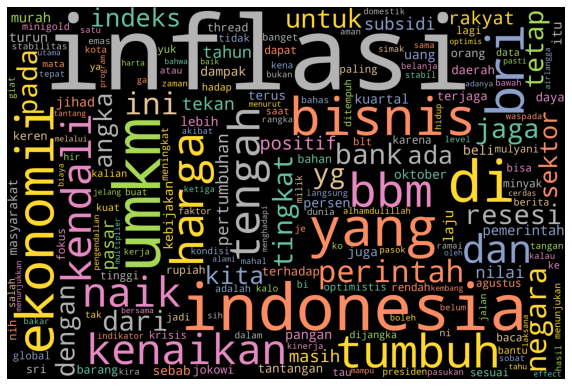

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 9))
    plt.imshow(wordcloud) 
    plt.axis("off");
    
all_words = ' '.join([tweets for tweets in df['teks']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [14]:
#df.sort_values("Tweet", inplace = True)
#df.drop(df.columns[[0,1,2,3,4]], axis = 1, inplace = True)#menghapus kolom
df.drop_duplicates(subset ="teks", keep = 'first', inplace = True)
df.to_csv('inflasi_labeling_5.csv',encoding='utf8', index=False)

### **SIMPAN DATA**

# PERHITUNGAN TF-IDF(MANUAL)

In [15]:
dm = pd.read_csv("inflasi_labeling_5.csv", usecols=["label","tweet"])
dm.columns = ["label","tweet"]
#dm.to_csv('inflasi TF_IDF_20.csv',encoding='utf8', index=False)
dm.head(20)

,label,tweet
0,positif,"['bijak', 'jokowi', 'fokus', 'jaga', 'inflasi'..."
1,positif,"['persen', 'kuartal', 'ekonomi', 'indonesia', ..."
2,positif,"['new', 'post', 'sekda', 'makassar', 'tangan',..."
3,positif,"['perintah', 'indonesia', 'kendali', 'inflasi'..."
4,positif,"['airlangga', 'inflasi', 'kir', 'kendali', 'hi..."
5,positif,"['summary', 'recession', 'dijngka', 'mild', 'a..."
6,positif,"['negara', 'jitu', 'perintah', 'tekan', 'tingk..."
7,positif,"['emas', 'alternatif', 'tabung', 'investasi', ..."
8,positif,"['efektif', 'tekan', 'inflasi', 'makassar']"
9,positif,"['blt', 'bbm', 'peran', 'cegah', 'inflasi', 'r..."


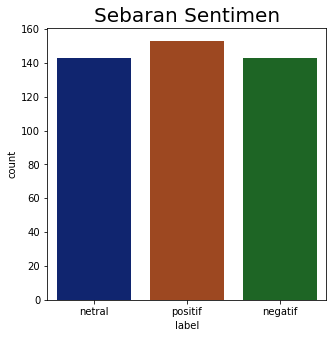

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
dm['label'].value_counts()
plt.figure(figsize=(5, 5))
sns.countplot(data=dm, x="label", palette="dark")
plt.title("Sebaran Sentimen", fontsize=20)
plt.xticks([0, 1, 2], ["netral", "positif", "negatif"])
plt.show()
     

In [17]:
dm['label'].value_counts()

negatif    153
positif    143
netral     143
Name: label, dtype: int64

### Mengubah string pada kelas tweet_tokens_stemmed diatas menjadi list dan simpan pada Pandas Series 'tekslist'

In [18]:
# convert list formated string to list
import ast

def convert_text_list(teks):
    teks = ast.literal_eval(teks)
    return [teks for teks in teks]

dm['tekslist'] = dm['tweet'].apply(convert_text_list)

print(dm['tekslist'][23])
print("\ntype : ", type(dm['tekslist'][23]))

['harap', 'sinergi', 'jaga', 'stabilitas', 'harga', 'dapat', 'topang', 'daya', 'beli', 'pulih', 'ekonomi', 'nasional']

type :  <class 'list'>


# Perhitungan TF

In [19]:
def calc_TF(document):
    #perhitungan jumlah kata
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    #perhitungan tf
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

dm["TF_dict"] = dm['tekslist'].apply(calc_TF)

dm["TF_dict"].head()

0    {'bijak': 0.1111111111111111, 'jokowi': 0.1111...
1    {'persen': 0.1, 'kuartal': 0.1, 'ekonomi': 0.1...
2    {'new': 0.08333333333333333, 'post': 0.0833333...
3    {'perintah': 0.25, 'indonesia': 0.125, 'kendal...
4    {'airlangga': 0.13333333333333333, 'inflasi': ...
Name: TF_dict, dtype: object

###### Term Frequency merupakan frekuensi kemunculan term i pada dokumen j dibagi dengan total term pada dokumen j. Ditulis dalam bentuk
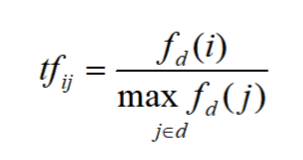


# Menampilkan Nilai TF

In [20]:
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in dm["TF_dict"][index]:
    print('%20s' % key, "\t", dm["TF_dict"][index][key])

                term 	 TF

            gubernur 	 0.1111111111111111
               sumut 	 0.1111111111111111
               harap 	 0.1111111111111111
               kadin 	 0.1111111111111111
               bantu 	 0.1111111111111111
             kendali 	 0.1111111111111111
             inflasi 	 0.1111111111111111
                jaga 	 0.1111111111111111
               sedia 	 0.1111111111111111


In [21]:
def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(dm["TF_dict"])

# Inverse Document Frequency (IDF)
IDF berfungsi mengurangi bobot suatu term jika kemunculannya banyak tersebar diseluruh dokumen, dituliskan dalam bentuk,


N adalah jumlah total document dalam corpus, N =|D|.

|{d ∈ D : t ∈ d}| = df(t) , adalah jumlah dokumen yang mengandung term t. IDF juga dapat dituliskan dalam bentuk,



In [22]:
#menghitung idf

n_document = len(dm)
def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#penyimpanan kamus idf
IDF = calc_IDF(n_document, DF)

# Perhitungan TF-IDF

In [23]:
#perhitungan TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#penyimpanan variabel TF-IDF 
dm["TF-IDF_dict"] = dm["TF_dict"].apply(calc_TF_IDF)

In [24]:
 #memunculkan nilai TF-IDF
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in dm["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", dm["TF_dict"][index][key] ,"\t" , dm["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

            gubernur 	 0.1111111111111111 	 0.5539874582674512
               sumut 	 0.1111111111111111 	 0.5990391369461362
               harap 	 0.1111111111111111 	 0.5220227835505867
               kadin 	 0.1111111111111111 	 0.5990391369461362
               bantu 	 0.1111111111111111 	 0.3612540076687728
             kendali 	 0.1111111111111111 	 0.25065089073178626
             inflasi 	 0.1111111111111111 	 0.03409412109472386
                jaga 	 0.1111111111111111 	 0.2842376542732233
               sedia 	 0.1111111111111111 	 0.5990391369461362


In [25]:
#matrik tf-idf
# pengurutan descending berdasarkan nilai DF  
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# pembuatan list kata dari pengurutan `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

dm["TF_IDF_Vec"] = dm["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("tampil baris pertama matrix TF_IDF_Vec Series\n")
print(dm["TF_IDF_Vec"][0])

print("\nukuran matrix : ", len(dm["TF_IDF_Vec"][0]))

tampil baris pertama matrix TF_IDF_Vec Series

[0.03409412109472386, 0.0, 0.0, 0.0, 0.22682757169340234, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2842376542732233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34889560376763673, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3612540076687728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.39995475147635234, 0.39995475147635234]

ukuran matrix :  50


In [26]:
# Convert Series to List
TF_IDF_Vec_List = np.array(dm["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
1,indonesia,17.733347
2,umkm,16.841798
0,inflasi,14.392497
6,kendali,14.373418
3,tumbuh,14.079795
8,bisnis,13.149579
4,ekonomi,12.827966
7,perintah,12.480989
12,jaga,12.194590
5,bri,12.052329


# pickle
#### Pickle digunakan untuk menyimpan dan membaca data ke dalam atau dari suatu file berformat .pkl. Sebagai contoh penerapan library pickle adalah ketika kamu menangani proyek text mining, pasti kamu akan melakukan pembobotan pada tiap kata yang dimiliki dengan menggunakan metode vektorisasi.Dapat menggunakan pickle untuk menyimpan proses vektorisasi tersebut ke dalam format .pkl yang nantinya dapat kamu baca saat kamu melakukan proses deployment ke dalam sebuah web apps. Selain untuk menyimpan sekaligus membaca proses vektorisasi, tapi juga bisa untuk menyimpan dan membaca pemodelan yang telah kita buat agar memudahkan dalam proses deployment ke web apps.

In [27]:
#import pickle

#pkl_filename = "pembobotan_inflasi.pkl"

#with open(pkl_filename, 'wb') as file:

 #   pickle.dump(filename, file)

#    file.close()

# PERHITUNGAN TF-IDF(LIBRARY)

# MODEL NAIVE BAYES

In [28]:
#PEMODELAN MENGGUNAKAN NAIVE BAYES CLASSIFIER
import collections, numpy
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, accuracy_score

In [29]:
feature = dm['tweet']
target = dm['label']
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
print("Jumlah Data Uji:", x_test.shape)
print("Jumlah Data Latih:",x_train.shape)
print("-------------------------------")
pos = (y_test == 'positif').sum()
net = (y_test == 'netral').sum()
neg = (y_test == 'negatif').sum()
postrain = (y_train == 'positif').sum()
nettrain = (y_train == 'netral').sum()
negtrain = (y_train == 'negatif').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen netral:",net)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("---------------------------------------------------")
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen netral:",nettrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
target.value_counts()

Jumlah Data Uji: (88,)
Jumlah Data Latih: (351,)
-------------------------------
Jumlah data uji dengan sentimen positif: 37
Jumlah data uji dengan sentimen netral: 23
Jumlah data uji dengan sentimen negatif: 28
---------------------------------------------------
Jumlah data latih dengan sentimen positif: 106
Jumlah data latih dengan sentimen netral: 120
Jumlah data latih dengan sentimen negatif: 125


negatif    153
positif    143
netral     143
Name: label, dtype: int64

In [30]:
v_model = TfidfVectorizer().fit(x_train)
v_data = v_model.transform(x_train)

In [31]:
cls_model_mnb = MultinomialNB().fit(v_data,y_train)
cls_model_mnb.score(v_data,y_train)*100

92.3076923076923

In [32]:
test_data = v_model.transform(x_test)

In [33]:
cls_model_mnb.score(test_data,y_test)*100
prediksi = cls_model_mnb.predict(test_data)
print(prediksi)
akurasi = cls_model_mnb.score(test_data,y_test)*100
print("akurasi :",akurasi)

['negatif' 'positif' 'positif' 'negatif' 'netral' 'positif' 'negatif'
 'positif' 'netral' 'negatif' 'netral' 'positif' 'negatif' 'negatif'
 'negatif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'negatif' 'positif' 'negatif' 'positif' 'positif' 'netral' 'netral'
 'netral' 'positif' 'positif' 'netral' 'negatif' 'netral' 'netral'
 'positif' 'negatif' 'positif' 'negatif' 'negatif' 'netral' 'positif'
 'negatif' 'positif' 'negatif' 'negatif' 'negatif' 'netral' 'positif'
 'netral' 'negatif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'netral' 'negatif' 'positif' 'negatif'
 'negatif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'netral' 'negatif' 'positif' 'negatif'
 'positif' 'negatif' 'positif' 'negatif' 'positif' 'netral' 'positif'
 'positif' 'positif' 'negatif' 'positif']
akurasi : 72.72727272727273


In [34]:
print(confusion_matrix(y_test,prediksi))
print(classification_report(y_test,prediksi))

[[21  3  4]
 [ 5 11  7]
 [ 4  1 32]]
              precision    recall  f1-score   support

     negatif       0.70      0.75      0.72        28
      netral       0.73      0.48      0.58        23
     positif       0.74      0.86      0.80        37

    accuracy                           0.73        88
   macro avg       0.73      0.70      0.70        88
weighted avg       0.73      0.73      0.72        88



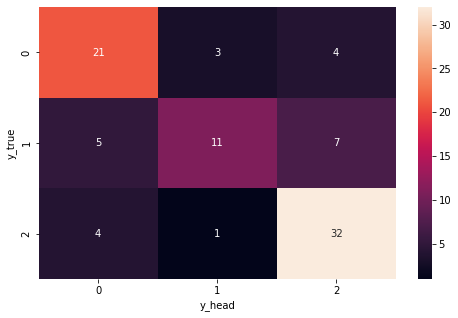

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediksi), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [43]:
#Kalimat
teks = ['investasi kripto sangat baik']
teks_clean = [remove(a) for a in teks]
teks_vec = v_model.transform(teks_clean)
teks_prediksi = cls_model_mnb.predict(teks_vec)#klasifikasi
for b,i in enumerate(teks_prediksi):
    print("Komentar tersebut bernada "+'\033[1m'+ i)

Komentar tersebut bernada netral


In [37]:
#Bentuk File
#teks = pd.read_csv("inflasi_test.csv", usecols=["teks"])
#teks_clean = [remove(a) for a in teks['teks']]
#teks_vec = v_model.transform(teks_clean)
#teks_prediksi = cls_model_mnb.predict(teks_vec)#klasifikasi
#for b,i in enumerate(teks_prediksi):
#    print("Komentar ke " + str(b+1) + " bernada "+ i)